In [1]:
The quantum key distribution protocol involves repeating this process enough times that an eavesdropper has a negligible chance of getting away with 
this interception. It is roughly as follows:

- Step 1

Alice chooses a string of random bits, e.g.:

1000101011010100

And a random choice of basis for each bit:

ZZXZXXXZXZXXXXXX

Alice keeps these two pieces of information private to herself.

- Step 2

Alice then encodes each bit onto a string of qubits using the basis she chose; this means each qubit is in one of the states |0>, |1>, |+> or |->, 
chosen at random. In this case, the string of qubits would look like this:
                |1>|0>|+>|0>|->|+>|->|0>|->|1>|+>|->|+>|->|+>|+>
This is the message she sends to Bob.

- Step 3

Bob then measures each qubit at random, for example, he might use the bases:

XZZZXZXZXZXZZZXZ

And Bob keeps the measurement results private.

- Step 4

Bob and Alice then publicly share which basis they used for each qubit. If Bob measured a qubit in the same basis Alice prepared it in, they use this 
to form part of their shared secret key, otherwise they discard the information for that bit.

- Step 5

Finally, Bob and Alice share a random sample of their keys, and if the samples match, they can be sure (to a small margin of error) that their 
transmission is successful.

SyntaxError: invalid syntax (2010258075.py, line 1)

In [25]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import random
from numpy.random import randint
import numpy as np

In [26]:
## FUNCTIONS
def encode_message(bits, bases):
    message = []
    
    for i in range(n):
        qc = QuantumCircuit(1,1)
        
        if bases[i] == 0:
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else:
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)

        qc.barrier()
        message.append(qc)

    return message


# The parameter memory is used to record and return the measurement outcomes for each shot of the simulation. When you set memory=True, it 
# tells the simulator to save the measurement result from each shot as a separate item in a list.
def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0:
            message[q].measure(0, 0)
        if bases[q] == 1:
            message[q].h(0)
            message[q].measure(0, 0)
        aer_sim = Aer.get_backend('aer_simulator')
        result = aer_sim.run(message[q], shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)

    return measurements


# has to remove bits that are measured in different bits by Bob and Alice
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    indices_of_good_bits = []
    for q in range(len(a_bases)):
        if a_bases[q] == b_bases[q]:
            good_bits.append(int(bits[q]))
            indices_of_good_bits.append(q)

    return good_bits, indices_of_good_bits


# check some bits to ensure that there is no eavesdropper
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        i = np.mod(i, len(bits))
        sample.append(bits.pop(i))

    return sample

In [32]:
## WITHOUT EAVESDROPPER

qc = QuantumCircuit(1, 1)

# generate pseudorandom numbers to generate pseudorandom key
np.random.seed(seed = 0)
n = 100

## Step 1
# Alice generates her bits
alice_bits = [random.randint(0, 1) for _ in range(n)]

alice's bases: [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]
alice's bits: [1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]
bit = 1
basis = 1


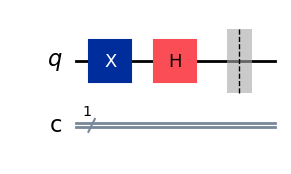

In [39]:
## Step 2
# Alice generates random basis in which qubits are encoded
alice_bases = [random.randint(0, 1) for _ in range(n)]
print("alice's bases: " + str(alice_bases))
print("alice's bits: " + str(alice_bits))
message = encode_message(alice_bits, alice_bases)

# print('bit = %i' % alice_bits[0])
# print('basis = %i' % alice_bases[0])
# message[0].draw(output='mpl')

In [34]:
## Step 3
# Bob decides on his measurement basis
bob_bases = [random.randint(0, 1) for _ in range(n)]
print("bob's bases: " + str(bob_bases))
bob_results = measure_message(message, bob_bases)
print("bob's results: " + str(bob_results))
# message[0].draw(output='mpl')

bob's bases: [1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
bob's results: [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]


In [35]:
## Step 4
# Remove bits that are measured in different bases by Bob and Alice respectively
alice_key, alice_indices = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key, bob_indices = remove_garbage(alice_bases, bob_bases, bob_results)
print(alice_key)
print(bob_key)

print("alice indices: " + str(alice_indices))
print("bob indices: " + str(bob_indices))

[1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
alice indices: [0, 1, 6, 8, 9, 12, 13, 15, 17, 19, 21, 22, 23, 25, 27, 29, 30, 34, 36, 38, 40, 44, 45, 47, 52, 54, 55, 57, 58, 60, 61, 64, 65, 66, 68, 69, 71, 73, 75, 76, 77, 81, 84, 85, 87, 88, 90, 91, 93, 94, 97, 99]
bob indices: [0, 1, 6, 8, 9, 12, 13, 15, 17, 19, 21, 22, 23, 25, 27, 29, 30, 34, 36, 38, 40, 44, 45, 47, 52, 54, 55, 57, 58, 60, 61, 64, 65, 66, 68, 69, 71, 73, 75, 76, 77, 81, 84, 85, 87, 88, 90, 91, 93, 94, 97, 99]


In [36]:
## Step 5
# compare bits
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)
print("  Bob's sample = " + str(bob_sample))
print("Alice's sample = " + str(alice_sample))

  Bob's sample = [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]
Alice's sample = [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]
